This a program that attempts to do a sentiment analysis of the book ALICE IN THE WONDERLAND by 
LEWIS CAROLL. 
The main features of this program include :
* sentiment analysis of each chapter of the book using
  both textblob and nltk library
* sentiment analysis of the ten most important characters in the book
* sentiment analysis of the overall character development of any character in the book


In [1]:
import numpy as np
import pandas as pd 
import spacy 
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords

#loaded the doc
text = open("AiW.txt", encoding="utf8") 
text = text.read()


In [2]:
# load spacy
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 2000000 #this is because default length is 1000000

In [3]:
#create object doc with text file loaded through spacy
doc = nlp(text)

In [4]:
# create a list containing all the index marking the ends of a chapter
chap_end = []
for i in range(len(doc)): 
    if doc[i].text == 'CHAPTER':
        chap_end.append(i)

In [5]:
# create a sentiment dictionary using textblob
chap_sentiment = {}
chapter = 0
for c in range(len(chap_end)-1):
    chap_sentiment[str(chapter)] = TextBlob(doc[chap_end[c]:chap_end[c+1]].text).polarity
    chapter +=1

In [6]:
print(chap_sentiment)

{'0': 0.028010441062942436, '1': 0.03730987109030938, '2': 0.036054251315046165, '3': 0.006358060317938491, '4': 0.00918940500013614, '5': 0.0520822901870265, '6': 0.0106825208934584, '7': 0.06330087859775357, '8': 0.1466299603174603, '9': 0.028727595899470926}


<AxesSubplot:>

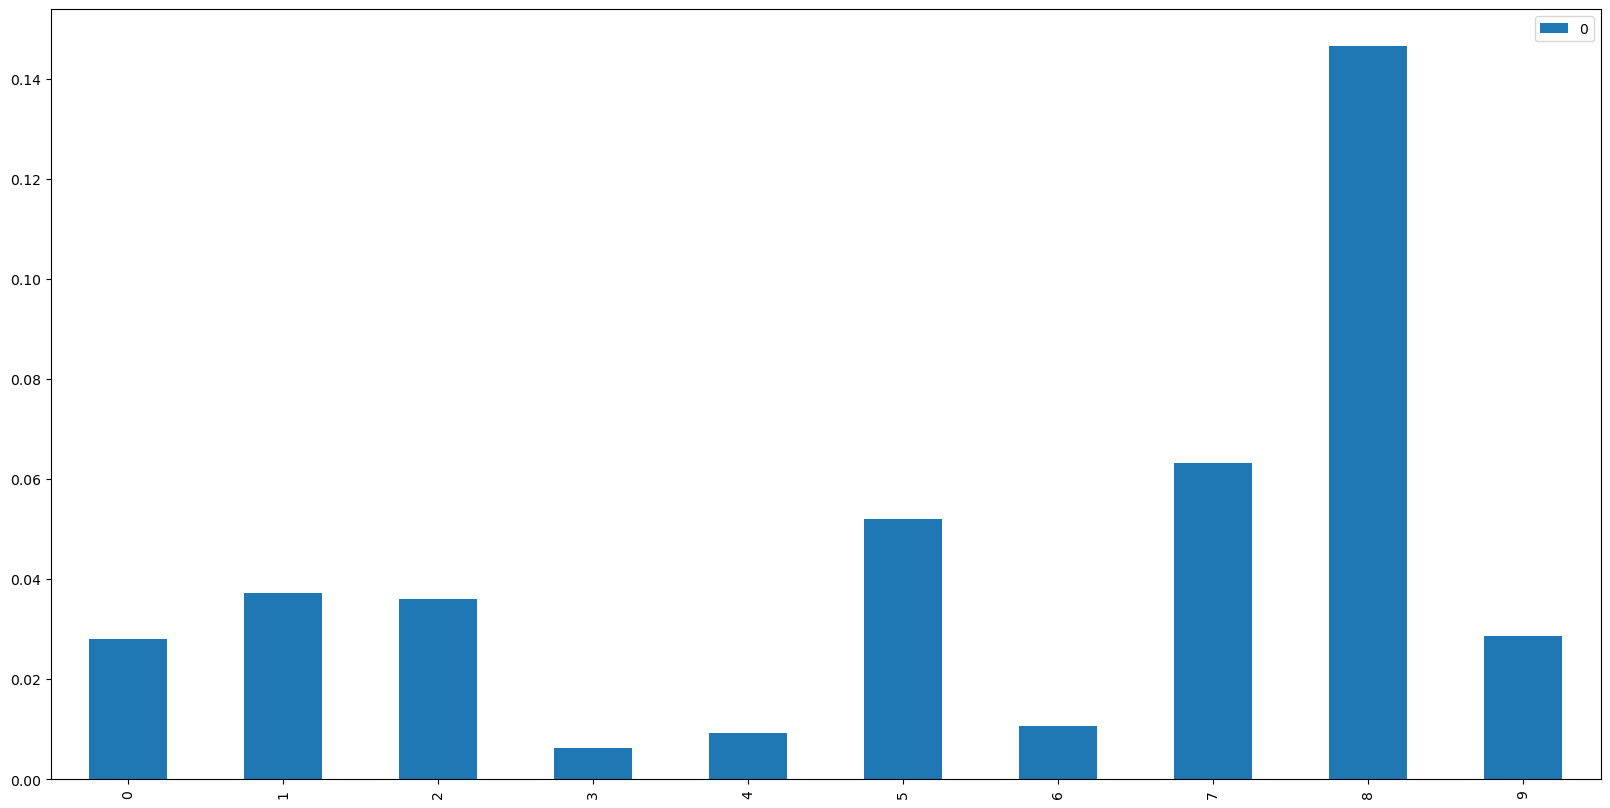

In [7]:
# make a graph of each chapter sentiment

df = pd.DataFrame.from_dict(chap_sentiment, orient = 'index')
df.plot.bar(figsize = (20,10))


In [8]:
# load sentiment analyzer using VADER from NLTK
sid = SentimentIntensityAnalyzer()

In [9]:
# create a dictionary of sentiment usinf sid
chap_sid = {}
chapter = 0
for c in range(len(chap_end)-1):
    tsid = sid.polarity_scores(doc[chap_end[c]:chap_end[c+1]].text)
    chap_sid[str(chapter)] = tsid['compound']
    chapter +=1

In [10]:
print(chap_sid)

{'0': 0.7555, '1': 0.9929, '2': 0.9986, '3': -0.7508, '4': 0.904, '5': 0.9562, '6': 0.997, '7': -0.9989, '8': 0.9748, '9': 0.9749}


<AxesSubplot:>

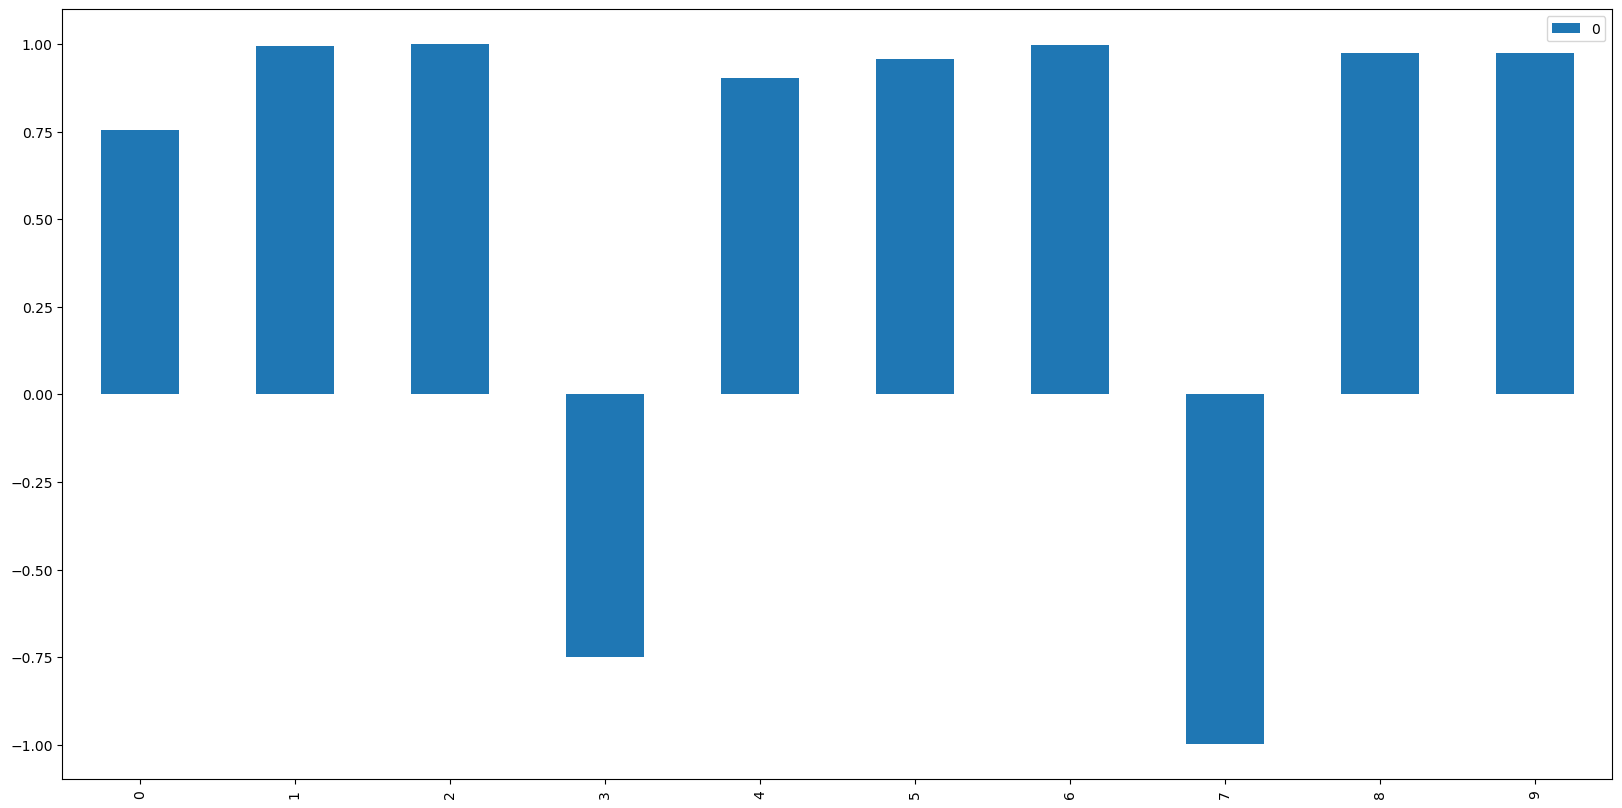

In [11]:
# plot the sid values of each chapter 

df = pd.DataFrame.from_dict(chap_sid, orient = 'index')

df.plot.bar(figsize = (20,10))


As you can see the ntlk library SentimentIntensityAnalyzer from the VADER lexicon works better
and gives a much more in-dept analysis of the chapter. Hence we continue use the SID from this point 
as the default analyzer

In [12]:
# create a function to split text when a double enter is detected
def create_para_list(st):
    return st.split('\n\n')

In [13]:
# seperate the books into different para
para = create_para_list(doc.text)

In [14]:
# create a function to analyze a chacter orientation using sid on a para 
def char_score(cand, para):
    score = 0
    for p in para:
        psid = sid.polarity_scores(p)
        psid_c=psid['compound']

        if cand in p and psid_c>0.5:
            score += 30*psid_c
            
        elif cand in p and psid_c<-0.5:
            score = score + 30*psid_c
        elif cand in p and psid_c>0.1:
            score = score + 10*psid_c
        elif cand in p and psid_c<-0.1:
            score = score + 20*psid_c
    return score
        

In [15]:
# for the doc create a word list and frequency dictionary
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
words = [x for x in words if not x.startswith('\n') ]
freq_distribution = FreqDist(words)
freq_d= dict(freq_distribution)


In [16]:
#sort the frequency distribution
ranked_list = sorted(freq_d, key=freq_d.get, reverse = True)


In [17]:
#create a list containing all proper nouns using spacy
prop_noun = [word.text for word in doc if word.pos_ == 'PROPN']

In [18]:
# create a filtered distribution dictionary conating only proper nouns
filtered_d={}
stop_words = set(stopwords.words("english"))
for word in ranked_list: 
    if (word in prop_noun) and (word not in stop_words) :
        filtered_d[word] = freq_d[word]
        print(word, ":", freq_d[word])
# manually remove words which you think escaped the module detection
filtered_d.pop("Project")
filtered_d.pop("Gutenberg")
filtered_d.pop("tm")
filtered_d.pop("Oh")


Alice : 396
Project : 82
Gutenberg : 82
Queen : 74
King : 61
Turtle : 59
tm : 57
Mock : 56
Hatter : 55
Gryphon : 55
Rabbit : 44
Duchess : 42
Dormouse : 40
Oh : 34
March : 34
Hare : 31
Mouse : 30
Caterpillar : 27
Cat : 26
Foundation : 24
White : 22
Bill : 15
Dodo : 13
cook : 13
Soup : 13
United : 13
States : 13
Literary : 13
Archive : 13
Dinah : 12
read : 12
Majesty : 12
CHAPTER : 11
Pigeon : 11
Footman : 11
Knave : 9
License : 9
William : 8
sir : 7
Lory : 7
Cheshire : 7
Soo : 7
U.S. : 7
eBooks : 7
English : 6
pardon : 6
Lizard : 6
Hearts : 6
eBook : 6
Seven : 5
Lobster : 5
Beautiful : 5
Information : 5
Mabel : 4
French : 4
Said : 4
Mary : 4
Ann : 4
Sure : 4
yer : 4
Father : 4
Quadrille : 4
Beau : 4
www.gutenberg.org : 4
Right : 3
Duck : 3
Eaglet : 3
Caucus : 3
Miss : 3
Pray : 3
Serpent : 3
Time : 3
Twinkle : 3
M : 3
Tis : 3
Tortoise : 3
Drawling : 3
Owl : 3
Panther : 3
PROJECT : 3
GUTENBERG : 3
General : 3
LIMITED : 3
Latitude : 2
Longitude : 2
Poor : 2
Paris : 2
Rome : 2
Conqueror : 2

34

In [19]:
print(filtered_d)

{'Alice': 396, 'Queen': 74, 'King': 61, 'Turtle': 59, 'Mock': 56, 'Hatter': 55, 'Gryphon': 55, 'Rabbit': 44, 'Duchess': 42, 'Dormouse': 40, 'March': 34, 'Hare': 31, 'Mouse': 30, 'Caterpillar': 27, 'Cat': 26, 'Foundation': 24, 'White': 22, 'Bill': 15, 'Dodo': 13, 'cook': 13, 'Soup': 13, 'United': 13, 'States': 13, 'Literary': 13, 'Archive': 13, 'Dinah': 12, 'read': 12, 'Majesty': 12, 'CHAPTER': 11, 'Pigeon': 11, 'Footman': 11, 'Knave': 9, 'License': 9, 'William': 8, 'sir': 7, 'Lory': 7, 'Cheshire': 7, 'Soo': 7, 'U.S.': 7, 'eBooks': 7, 'English': 6, 'pardon': 6, 'Lizard': 6, 'Hearts': 6, 'eBook': 6, 'Seven': 5, 'Lobster': 5, 'Beautiful': 5, 'Information': 5, 'Mabel': 4, 'French': 4, 'Said': 4, 'Mary': 4, 'Ann': 4, 'Sure': 4, 'yer': 4, 'Father': 4, 'Quadrille': 4, 'Beau': 4, 'www.gutenberg.org': 4, 'Right': 3, 'Duck': 3, 'Eaglet': 3, 'Caucus': 3, 'Miss': 3, 'Pray': 3, 'Serpent': 3, 'Time': 3, 'Twinkle': 3, 'M': 3, 'Tis': 3, 'Tortoise': 3, 'Drawling': 3, 'Owl': 3, 'Panther': 3, 'PROJECT': 

In [20]:
# give each element in the filtered dictionary above a sid score 
char_index = {}

for cand in filtered_d: 
    char_index[cand] = char_score(cand, para)


<AxesSubplot:>

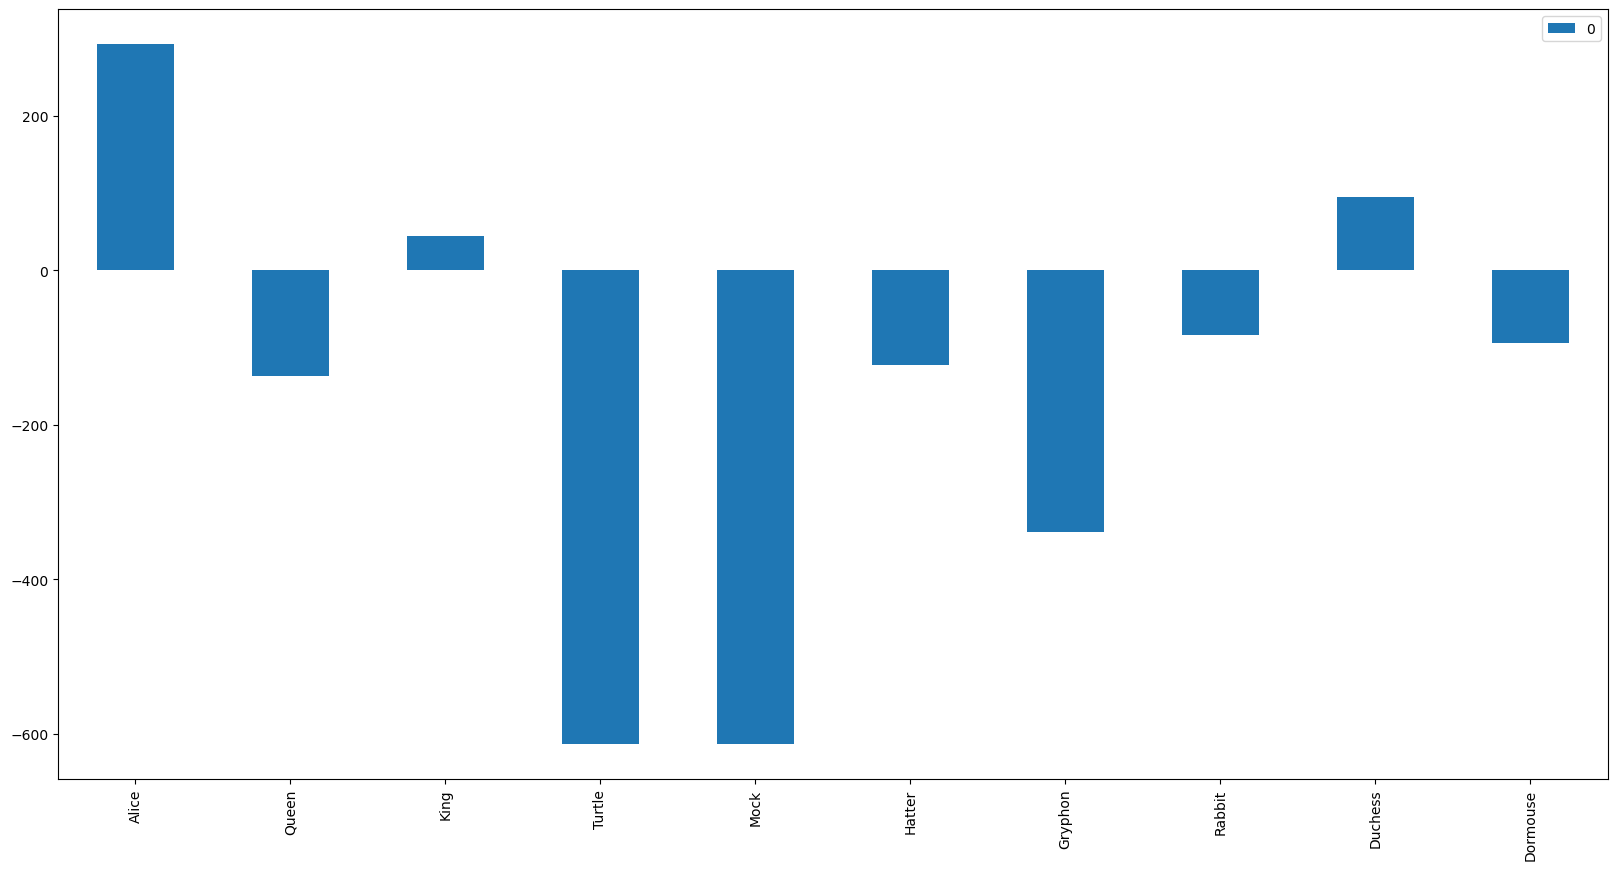

In [21]:
# plot a graph of the first 10 elements of the filtered dictionary and thier sid scores
# assuming the top 10 most repeated words are all characters, 
#this shows the sid of all important characters

df = pd.DataFrame.from_dict(char_index, orient = 'index').iloc[0:10]


df.plot.bar(figsize = (20,10))

In [22]:
# create a function that records all the sid scores of the character along each sentences 
# throughout the book, essentially analysing the character development of the character
def char_sent(char):
    char_sent = []
    for sent in doc.sents:
        if char in sent.text:
            char_sent.append(sent.text)
    return char_sent

def char_dev(char):
    char_dev={}
    counter =0
    sents = char_sent(char)
    for sent in sents:
        csid = sid.polarity_scores(sent)
        char_dev[str(counter)] = csid['compound']
        counter +=1
    return char_dev

In [23]:
# show the character development of the character rabbit
rabbit_dev = char_dev('Rabbit')

<AxesSubplot:title={'center':'RABBIT CHARACTER DEVELOPMENT'}>

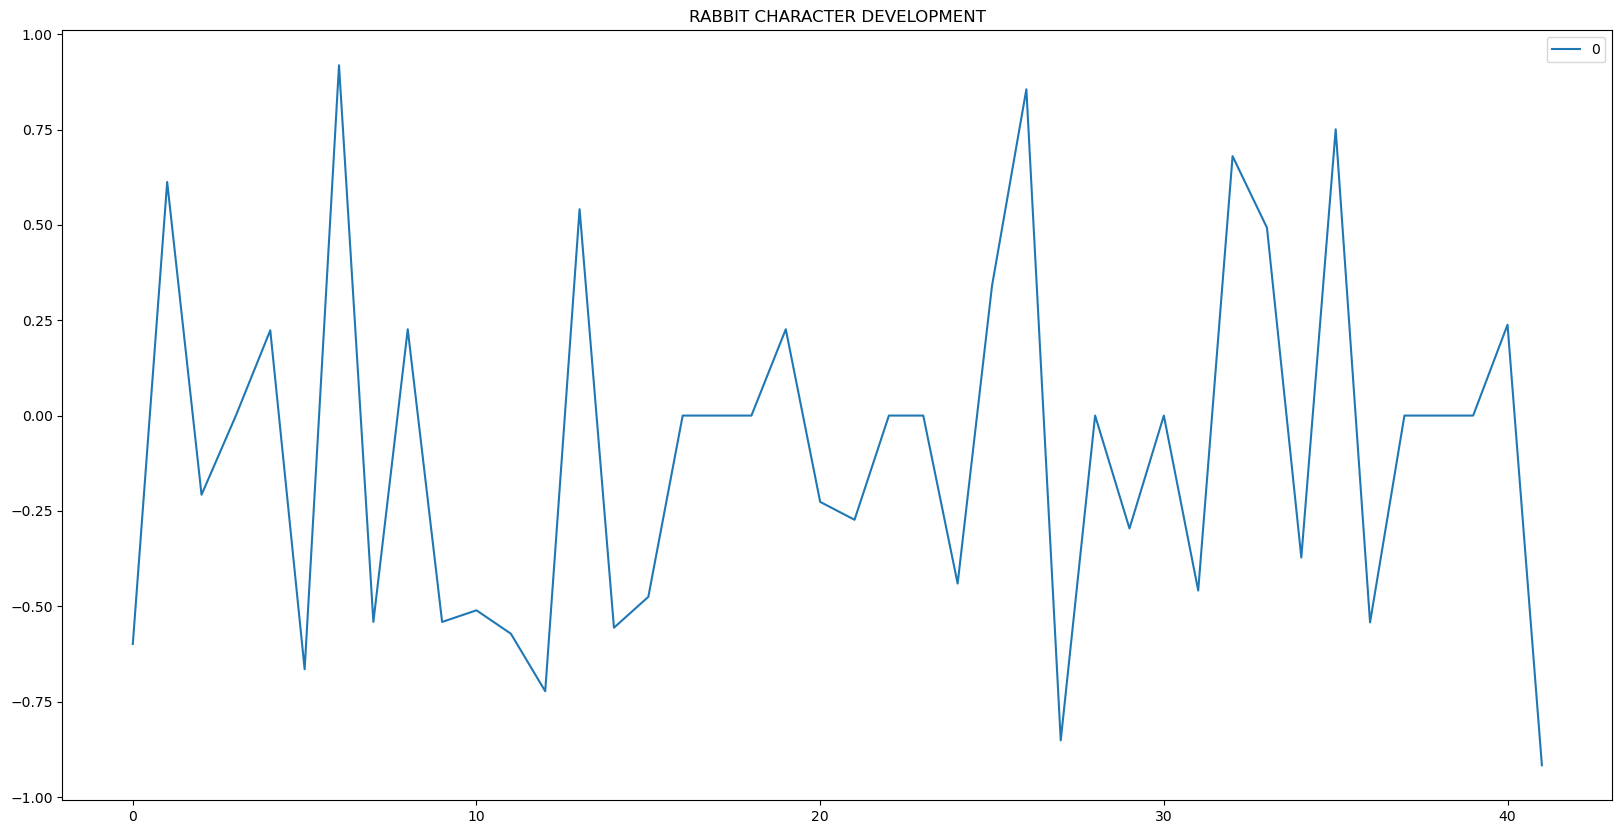

In [24]:
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(rabbit_dev, orient = 'index')


df.plot.line(figsize = (20,10), title = 'RABBIT CHARACTER DEVELOPMENT')